## Problem Statement

Parkinson disease is a progressive nervous system disorder that affects movemeny leading to shaking, stiffness, and difficulty in walking, balance, and coordination. Parkinson symptoms usually begin gradually and get worse over time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df= pd.read_csv('parkinsons.csv')

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.shape

(195, 24)

In [6]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [10]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

<AxesSubplot:ylabel='status'>

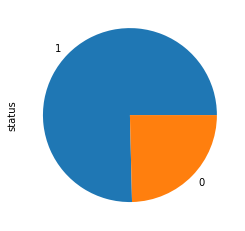

In [11]:
df['status'].value_counts().plot.pie()

## Attribute information
MDVP Fo(HZ) - Average vocal fundamental frequency
MDVP Fhi(Hz)- Maximum vocal fundamental frequency
DFA- Signal fractal scalling exponent spread1, spread2
RPDE- Non linear dynamical complexity measure


[]

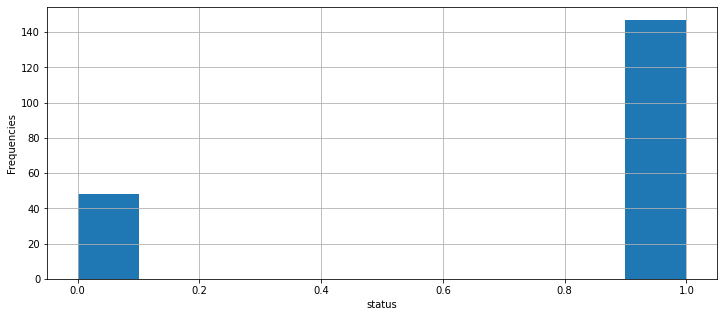

In [12]:
plt.figure(figsize=(12,5))
df.status.hist()
plt.xlabel('status')
plt.ylabel('Frequencies')
plt.plot()

<AxesSubplot:xlabel='status', ylabel='NHR'>

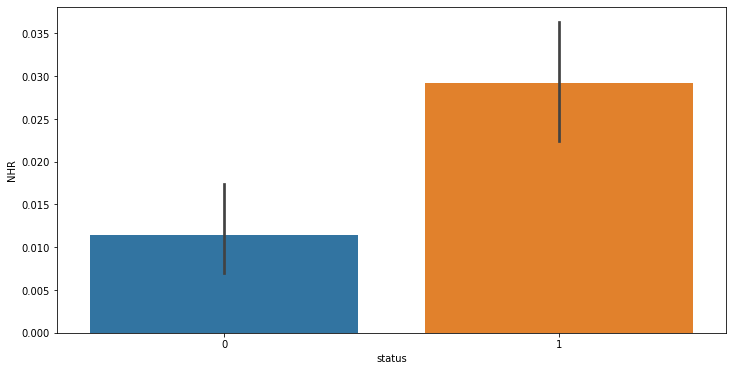

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x='status', y='NHR', data=df)

The patients suffering from Parkinson will have high NHR that is the measure of ratio of noise to tonal components in the voice

<AxesSubplot:xlabel='status', ylabel='HNR'>

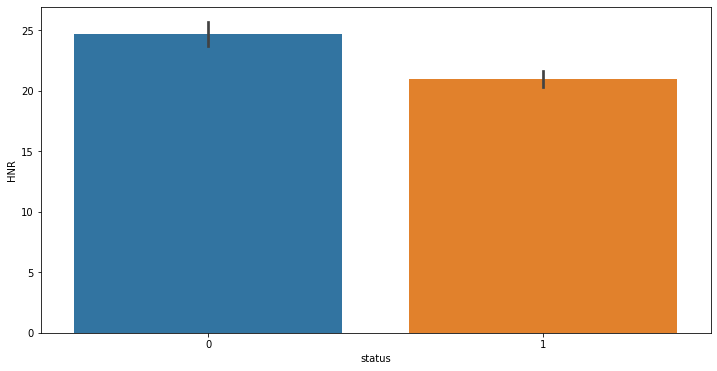

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x='status', y='HNR', data=df)

The patients suffering from Parkinson will have low NHR that is the measure of ratio of noise to tonal components in the voice

<AxesSubplot:xlabel='status', ylabel='RPDE'>

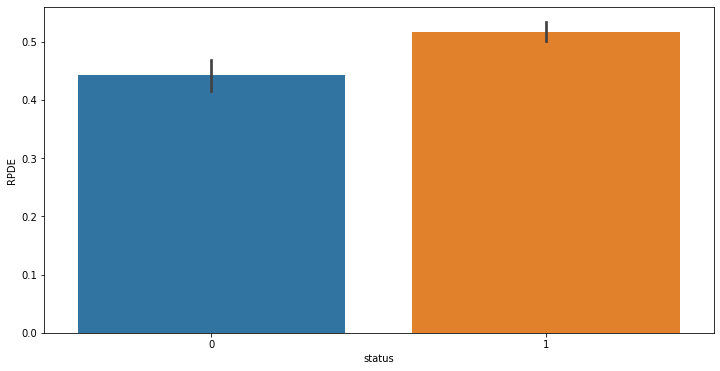

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x='status', y='RPDE', data=df)

RDPE is high in people suffering with Parkinson

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

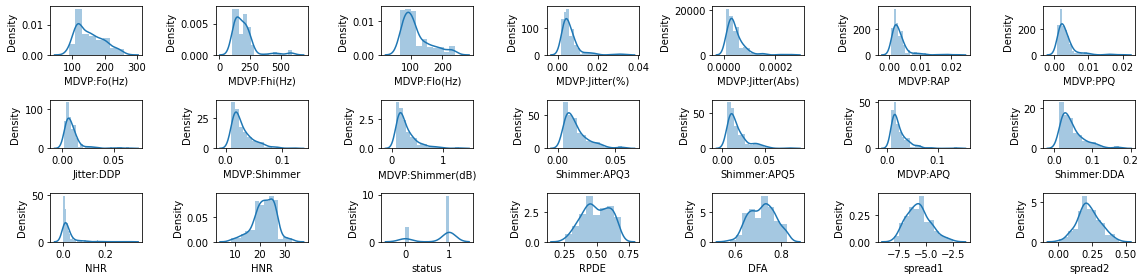

In [16]:
rows=3
cols=7
fig, ax= plt.subplots(nrows= rows, ncols= cols, figsize=(16,4))
col= df.columns
index=1
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax=ax[i][j])
        index=index+1
plt.tight_layout()

In [17]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [18]:
X= df.drop(['name','status'],axis=1)
y= df['status']

In [19]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [21]:
X.shape

(195, 22)

In [22]:
y.shape

(195,)

In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state= 2)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(156, 22)
(39, 22)
(156,)
(39,)


In [25]:
scaler= StandardScaler()

In [26]:
scaler.fit(X_train)

StandardScaler()

In [27]:
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [28]:
X_train

array([[ 0.63239631, -0.02731081, -0.87985049, ..., -0.97586547,
        -0.55160318,  0.07769494],
       [-1.05512719, -0.83337041, -0.9284778 , ...,  0.3981808 ,
        -0.61014073,  0.39291782],
       [ 0.02996187, -0.29531068, -1.12211107, ..., -0.43937044,
        -0.62849605, -0.50948408],
       ...,
       [-0.9096785 , -0.6637302 , -0.160638  , ...,  1.22001022,
        -0.47404629, -0.2159482 ],
       [-0.35977689,  0.19731822, -0.79063679, ..., -0.17896029,
        -0.47272835,  0.28181221],
       [ 1.01957066,  0.19922317, -0.61914972, ..., -0.716232  ,
         1.23632066, -0.05829386]])

In [29]:
X_test

array([[-1.70008583e+00, -9.67968410e-01, -7.70130215e-01,
        -2.75000683e-01,  4.16156683e-01, -2.92615113e-01,
        -9.70869783e-02, -2.91621655e-01, -4.94706656e-01,
        -4.90058396e-01, -5.32488171e-01, -4.26848854e-01,
        -3.60251422e-01, -5.32484688e-01, -3.57189713e-01,
        -1.08840337e-01,  1.06963705e+00,  1.05628304e+00,
         3.72180199e-01,  1.94886208e+00,  3.66935071e-02,
         4.44314482e-01],
       [-1.39044095e+00, -9.29681132e-01, -7.37045677e-01,
         7.42068829e-01,  1.50451280e+00,  8.54349819e-01,
         7.33639862e-01,  8.53234751e-01, -3.12538562e-03,
         3.01660094e-01,  1.16511011e-01, -7.67595149e-02,
        -2.23967413e-01,  1.16829276e-01, -1.19644974e-01,
        -5.22790834e-01,  9.12650090e-01,  1.31721995e+00,
         6.70118138e-01,  4.74318608e-01,  1.42454868e-02,
         7.46859799e-01],
       [-1.35302065e+00, -6.29175292e-01, -7.29027225e-01,
         4.92094897e-01,  1.23242377e+00,  4.52288742e-01,
    

## Support Vector Machines

In [30]:
model= svm.SVC(kernel='linear')

In [31]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [32]:
X_train_pred= model.predict(X_train)
training_data_accuracy= accuracy_score(y_train, X_train_pred)

In [33]:
print(training_data_accuracy)

0.8846153846153846


In [34]:
X_test_pred= model.predict(X_test)
test_data_accuracy= accuracy_score(y_test, X_test_pred)

In [35]:
print(test_data_accuracy)

0.8717948717948718


In [36]:
confusion_matrix(y_train, X_train_pred)

array([[ 27,  13],
       [  5, 111]], dtype=int64)

In [37]:
input_data= (95.05600,120.10300,91.22600,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.25500,0.01441,0.01725,0.02444,0.04324,0.01022,21.86200,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362)
input_numpy= np.asarray(input_data)
input_reshape= input_numpy.reshape(1,-1)
std_data= scaler.transform(input_reshape)
prediction= model.predict(std_data)
print(prediction)


[1]


## Random Forest Classifier

In [38]:
model2= RandomForestClassifier()

In [39]:
model2.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
X_train_pred2= model2.predict(X_train)
training_data_accuracy2= accuracy_score(y_train, X_train_pred2)

In [41]:
print(training_data_accuracy2)

1.0


In [42]:
confusion_matrix(y_train, X_train_pred2)

array([[ 40,   0],
       [  0, 116]], dtype=int64)

In [43]:
X_test_pred2= model2.predict(X_test)
test_data_accuracy2= accuracy_score(y_test, X_test_pred2)

In [44]:
print(test_data_accuracy2)

0.8974358974358975


In [45]:
confusion_matrix(y_test, X_test_pred2)

array([[ 6,  2],
       [ 2, 29]], dtype=int64)